# Paul's EDA

In [73]:
import pandas as pd
import numpy as np

from pyprojroot import here
import wandb

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [3]:
# Download the latest data
if False:
    run = wandb.init()
    artifact = run.use_artifact('w207-predictive-maintenance/predictive-maintenance/ai4i2020:v0', type='dataset')
    artifact_dir = artifact.download(here('data'))

In [4]:
X_train = pd.read_csv(here('data/processed/X_train.csv'))
print("X_train:")
print(X_train.describe())
print()
Y_train = pd.read_csv(here('data/processed/Y_train.csv'))
print("Y_train")
print(Y_train.describe())

X_train:
       quality_variation  Air temperature  Process temperature  \
count        7499.000000      7499.000000          7499.000000   
mean            0.498066       300.002854           310.005347   
std             0.669290         2.005323             1.484268   
min             0.000000       295.300000           305.700000   
25%             0.000000       298.300000           308.800000   
50%             0.000000       300.100000           310.100000   
75%             1.000000       301.500000           311.100000   
max             2.000000       304.500000           313.800000   

       Rotational speed       Torque    Tool wear  
count       7499.000000  7499.000000  7499.000000  
mean        1537.916789    40.039725   108.030004  
std          180.646539     9.970724    63.685869  
min         1181.000000     3.800000     0.000000  
25%         1422.000000    33.300000    53.000000  
50%         1502.000000    40.100000   108.000000  
75%         1610.000000    46.90

In [85]:
# Look at the percentage of the dataset each label is 1
Y_train[Y_train == 1].count() / Y_train.count()

Machine failure    0.032671
TWF                0.004801
HDF                0.011602
PWF                0.009868
OSF                0.008801
RNF                0.001867
dtype: float64

In [5]:
# Look at the distinct types of labels across all columns
unique_labels = Y_train.value_counts()

# Get index one-hot encoding as a numpy array of tuples
one_hot_array_of_tuples = unique_labels.index.to_numpy()

# Convert to a 2D array
one_hot_array = np.array([list(index_element) for index_element in one_hot_array_of_tuples])

# Get the label names as an array
label_names = np.array(unique_labels.index.names)

# Filter the label names by the one-hot encoding for each row and list as a string
row_label_names = [str(label_names[one_hot_row == 1]) for one_hot_row in one_hot_array]

# Re-index the data
unique_labels.index = row_label_names

print(unique_labels)

[]                                       7241
['Machine failure' 'HDF']                  78
['Machine failure' 'PWF']                  61
['Machine failure' 'OSF']                  48
['Machine failure' 'TWF']                  32
['RNF']                                    13
['Machine failure' 'PWF' 'OSF']             9
['Machine failure' 'HDF' 'OSF']             6
['Machine failure']                         4
['Machine failure' 'HDF' 'PWF']             3
['Machine failure' 'TWF' 'OSF']             2
['Machine failure' 'TWF' 'RNF']             1
['Machine failure' 'TWF' 'PWF' 'OSF']       1
Name: count, dtype: int64


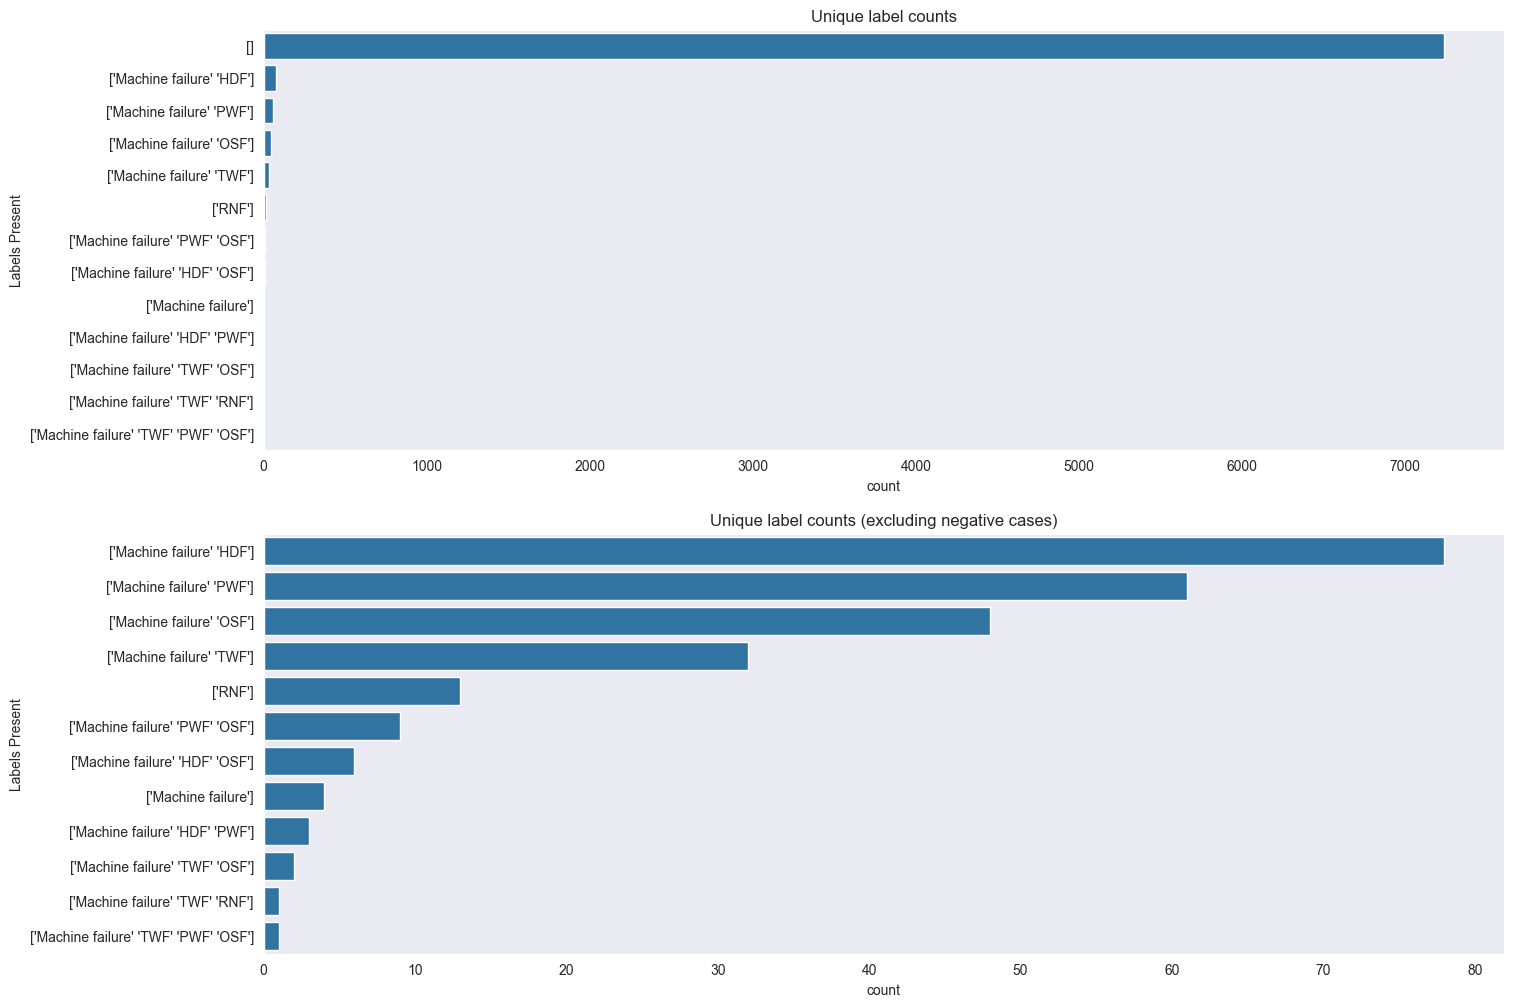

In [6]:
sns.set_style('dark')

fig, ax = plt.subplots(nrows=2, figsize=(16,12))

sns.barplot(unique_labels, orient='h', ax=ax[0])
ax[0].set_title("Unique label counts")
ax[0].set_ylabel("Labels Present")

sns.barplot(unique_labels[1:], orient='h', ax=ax[1])
ax[1].set_title("Unique label counts (excluding negative cases)")
ax[1].set_ylabel("Labels Present")

plt.show()

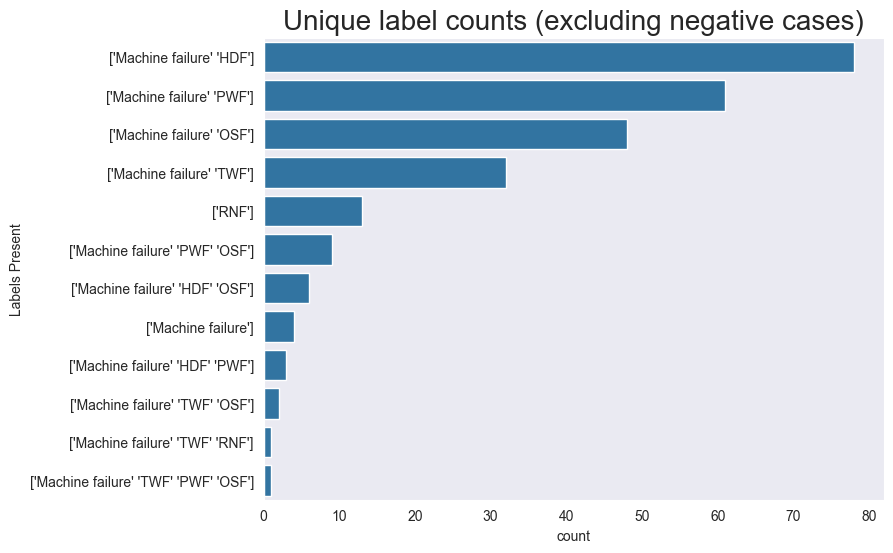

In [79]:
sns.set_style('dark')

fig, ax = plt.subplots(nrows=1, figsize=(8,6))

bar = sns.barplot(unique_labels[1:], orient='h', ax=ax)
bar.set_title("Unique label counts (excluding negative cases)", size=20)
bar.set_ylabel("Labels Present")

plt.show()

# Note For Graders

Everything below this block was written originally by Jeremy. He did not check the code into Github and also did not restrict his analysis to the training set, so I (Paul) am integrating his work into my notebook and making some adjustments.

In [ ]:
# Count the number of failures by failure type
failure_counts = Y_train[['TWF','HDF','PWF','OSF','RNF']].sum().sort_values(ascending=False)
print(failure_counts)
# The failure count by category is consistent with the dataset description in the datasets introductory paper.
# See (https://www.semanticscholar.org/paper/Explainable-Artificial-Intelligence-for-Predictive-Matzka/b609c8e9ec6a2b8c642810953ef6dffe5766f7c1)

HDF    87
PWF    74
OSF    66
TWF    36
RNF    14
dtype: int64


In [82]:
print(failure_counts * 100 / Y_train.size)

HDF    0.193359
PWF    0.164466
OSF    0.146686
TWF    0.080011
RNF    0.031115
dtype: float64


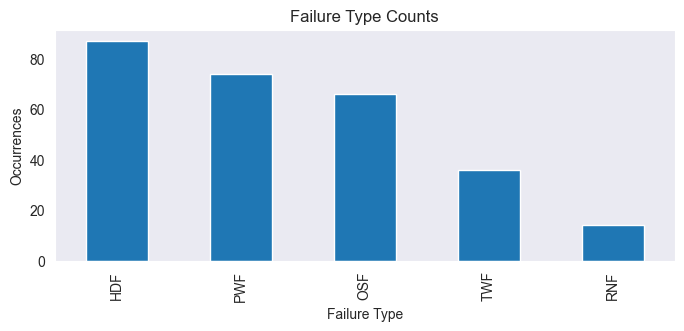

In [31]:
# Failure frequency by failure category bar chart
failure_counts.plot(kind='bar', figsize=(8,3))
plt.title("Failure Type Counts")
plt.ylabel("Occurrences")
plt.xlabel("Failure Type")
plt.show()

In [62]:
df = Y_train.join(X_train, how="left")

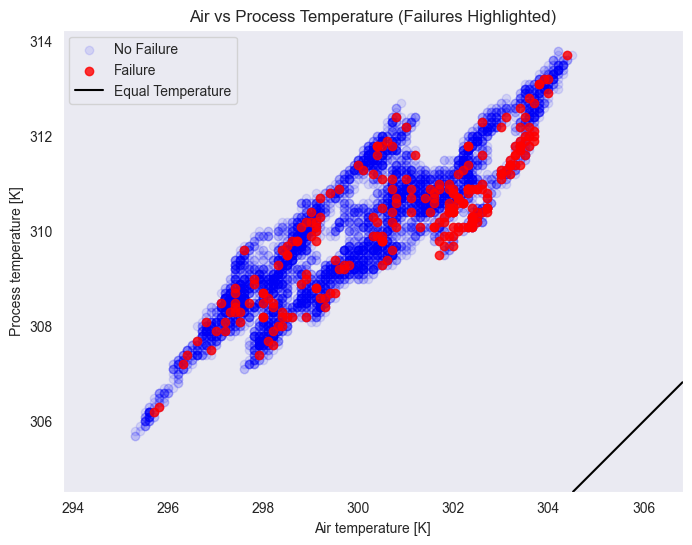

In [63]:
# Failure by air temperature and process temperature

# Separate failure and non-failure points
failures = df[df['Machine failure'] == 1]
non_failures = df[df['Machine failure'] == 0]

plt.figure(figsize=(8,6))

# Plot non-failures with high transparency
plt.scatter(non_failures['Air temperature'], 
            non_failures['Process temperature'], 
            c='blue', alpha=0.1, label='No Failure')

# Plot failures with higher opacity
plt.scatter(failures['Air temperature'], 
            failures['Process temperature'], 
            c='red', alpha=0.8, label='Failure')

# Plot line of equal temperature
diag_min = plt.ylim()[0]
diag_max = plt.xlim()[1]
plt.axline((diag_min, diag_min), (diag_max, diag_max), 
         c='black', label='Equal Temperature')

plt.xlabel("Air temperature [K]")
plt.ylabel("Process temperature [K]")
plt.axis('equal')
plt.title("Air vs Process Temperature (Failures Highlighted)")
plt.legend()
plt.show()

# No clear relationship between air temperature and process temperature here.
# Failure rate increases when air temperature is high, maybe?

/var/folders/_b/7c8j58qs08x58wp8t3hfhcy40000gn/T/ipykernel_43618/1818708806.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  failure_rate = df.groupby('Temp_diff_bin')['Machine failure'].mean()


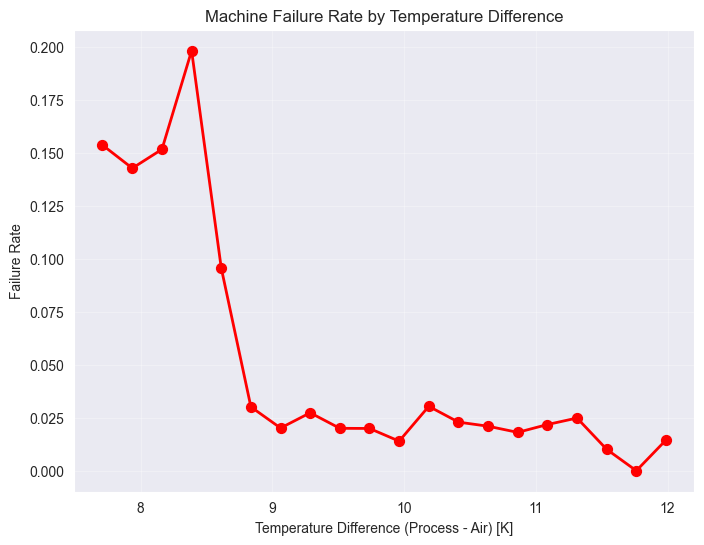

In [65]:
# Failure rate by temperature difference

# Compute temperature difference
df['Temp_diff'] = df['Process temperature'] - df['Air temperature']

# Bin temperature difference (e.g., 20 bins)
df['Temp_diff_bin'] = pd.cut(df['Temp_diff'], bins=20)

# Compute failure rate per bin
failure_rate = df.groupby('Temp_diff_bin')['Machine failure'].mean()
bin_centers = [interval.mid for interval in failure_rate.index]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(bin_centers, failure_rate, color='red', s=50)
plt.plot(bin_centers, failure_rate, color='red', linewidth=2)
plt.xlabel("Temperature Difference (Process - Air) [K]")
plt.ylabel("Failure Rate")
plt.title("Machine Failure Rate by Temperature Difference")
plt.grid(alpha=0.3)
plt.show()

# Failure appears to increase when process temperature and air temperature are similar

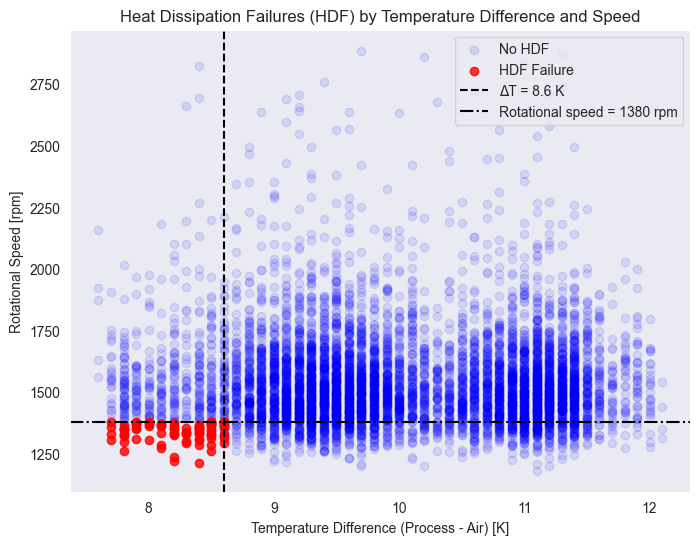

In [67]:
# Scatterplot of Failure by Temperature Difference and Rotational Speed

# Compute temperature difference
df['Temp_diff'] = df['Process temperature'] - df['Air temperature']

# Separate HDF failures
hdf_failures = df[df['HDF'] == 1]
non_hdf = df[df['HDF'] == 0]

plt.figure(figsize=(8,6))

# Plot non-HDF points
plt.scatter(non_hdf['Temp_diff'], non_hdf['Rotational speed'],
            c='blue', alpha=0.1, label='No HDF')

# Plot HDF points
plt.scatter(hdf_failures['Temp_diff'], hdf_failures['Rotational speed'],
            c='red', alpha=0.8, label='HDF Failure')

# Add threshold lines
plt.axvline(x=8.6, color='k', linestyle='--', label='ΔT = 8.6 K')
plt.axhline(y=1380, color='k', linestyle='-.', label='Rotational speed = 1380 rpm')

plt.xlabel("Temperature Difference (Process - Air) [K]")
plt.ylabel("Rotational Speed [rpm]")
plt.title("Heat Dissipation Failures (HDF) by Temperature Difference and Speed")
plt.legend()
plt.show()

# This plot is kind of cheating, as I looked under the hood of how the data was generated and plotted that exact process/distribution.
# Maybe this doesn't belong in the EDA/report. At the very least it demonstrates that the data distribution is as expected, though the underlying logic would not be available for non-simulated data such as this.

In [71]:
# Failure by Tool Wear and Product Type
print(df)
sns.boxplot(x='Type', y='Tool wear', hue='Machine failure', data=df)
plt.title("Tool Wear by Product Type (with Failures)")
plt.xlabel('Tool wear [min]')
plt.show()
# Lots of variation, but failure occurs at higher wear, and higher quality variants fail later.

      Machine failure  TWF  HDF  PWF  OSF  RNF  quality_variation  \
0                   0    0    0    0    0    0                  0   
1                   0    0    0    0    0    0                  0   
2                   0    0    0    0    0    0                  1   
3                   0    0    0    0    0    0                  0   
4                   0    0    0    0    0    0                  1   
...               ...  ...  ...  ...  ...  ...                ...   
7494                0    0    0    0    0    0                  1   
7495                0    0    0    0    0    0                  1   
7496                0    0    0    0    0    0                  0   
7497                0    0    0    0    0    0                  0   
7498                0    0    0    0    0    0                  0   

      Air temperature  Process temperature  Rotational speed  Torque  \
0               298.0                308.3              1473    42.6   
1               300.5      

ValueError: Could not interpret value `Type` for `x`. An entry with this name does not appear in `data`.

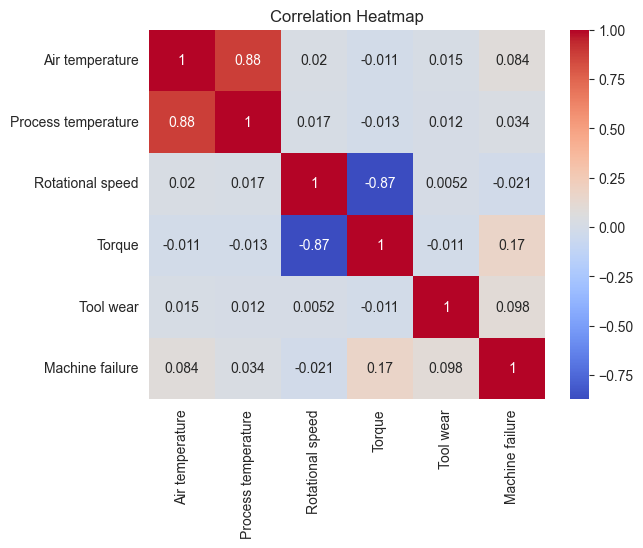

In [72]:
# Feature-Feature and Feature-Failure correlation heatmap
corr = df[['Air temperature','Process temperature',
           'Rotational speed','Torque',
           'Tool wear','Machine failure']].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
# Failure is strongly correlated with air temperature
# Air temperature and process temperature are strongly correlated
# Rotational speed and torque are strongly negatively correlated

/Users/paulterrasi/Documents/datasci_207/w207-predictive-maintenance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/paulterrasi/Documents/datasci_207/w207-predictive-maintenance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/paulterrasi/Documents/datasci_207/w207-predictive-maintenance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/paulterrasi/Documents/datasci_207/w207-predictive-maintenance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with

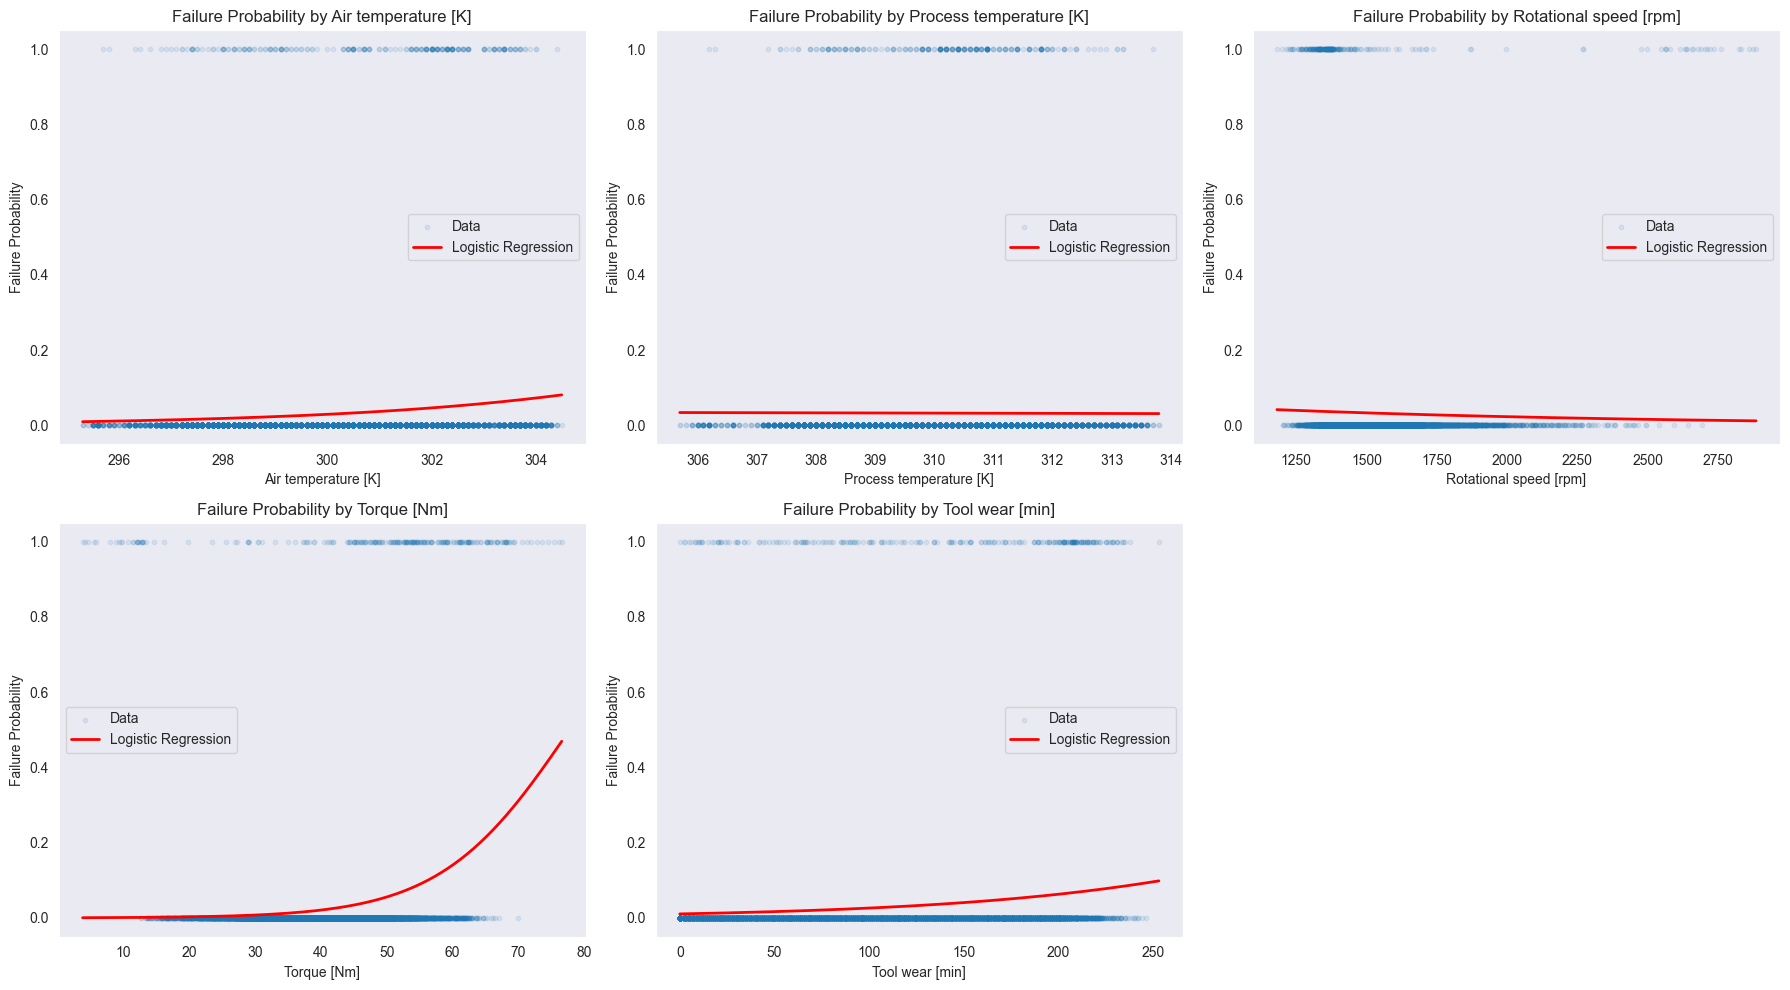

In [77]:
# Logistic regression fit to failure probability by feature value. This shows if and how well a feature can be used to predict failure.

# Features to analyze, key is df name and value is label name
features = {
    'Air temperature': 'Air temperature [K]', 
    'Process temperature': 'Process temperature [K]', 
    'Rotational speed': 'Rotational speed [rpm]', 
    'Torque': 'Torque [Nm]', 
    'Tool wear': 'Tool wear [min]'
}

y = df['Machine failure']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, (key, label) in enumerate(features.items()):
    X = df[[key]]
    
    # Fit logistic regression
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X, y)
    
    # Range of feature values
    x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    
    # Predicted probabilities
    pred_probs = log_reg.predict_proba(x_range)[:,1]
    
    # Scatter original data (downsample to avoid clutter)
    axes[i].scatter(X, y, alpha=0.1, s=10, label='Data')
    axes[i].plot(x_range, pred_probs, color='red', linewidth=2, label='Logistic Regression')
    
    axes[i].set_title(f"Failure Probability by {label}")
    axes[i].set_xlabel(label)
    axes[i].set_ylabel("Failure Probability")
    axes[i].legend()

# Hide unused subplot if number of features < grid size
if len(features) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#It appears that failure increases with torque, air temperature, and tool wear, decreases with rotational speed, and is neutral in respect to process temperature.